In [40]:
import pandas as pd

In [ ]:
import pandas as pd
import ssl

# SSL 인증서 검증 비활성화
ssl._create_default_https_context = ssl._create_unverified_context

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)  # 데이터셋 읽기

data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [42]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [43]:
data.info() # 변수이름, 결측치, 자료형 종류 확인 가능

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [44]:
from sklearn.model_selection import train_test_split  # 사이킷런에서 데이터 나누는 함수

# 독립변수(X)와 종속변수(y) 나누기
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]  # 독립변수
y = data['charges']  # 종속변수 (예측 대상)

# 학습 데이터 80%, 시험 데이터 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [46]:
from sklearn.linear_model import LinearRegression

# 모델 정의
model = LinearRegression()

# 데이터 학습 (X_train, y_train이 있어야 함)
model.fit(X_train, y_train)

# 예측 수행
pred = model.predict(X_test)

In [47]:

# 실제값(y_test)와 예측값(pred)을 하나의 테이블로 합치기
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

# 테이블 출력
print(comparison.head())  


          actual          pred
691    8068.1850  12143.827121
784    4350.5144   5923.837728
266   17179.5220  28954.978721
1147   2261.5688   3439.339971
414    2134.9015   4198.177894


<Axes: xlabel='actual', ylabel='pred'>

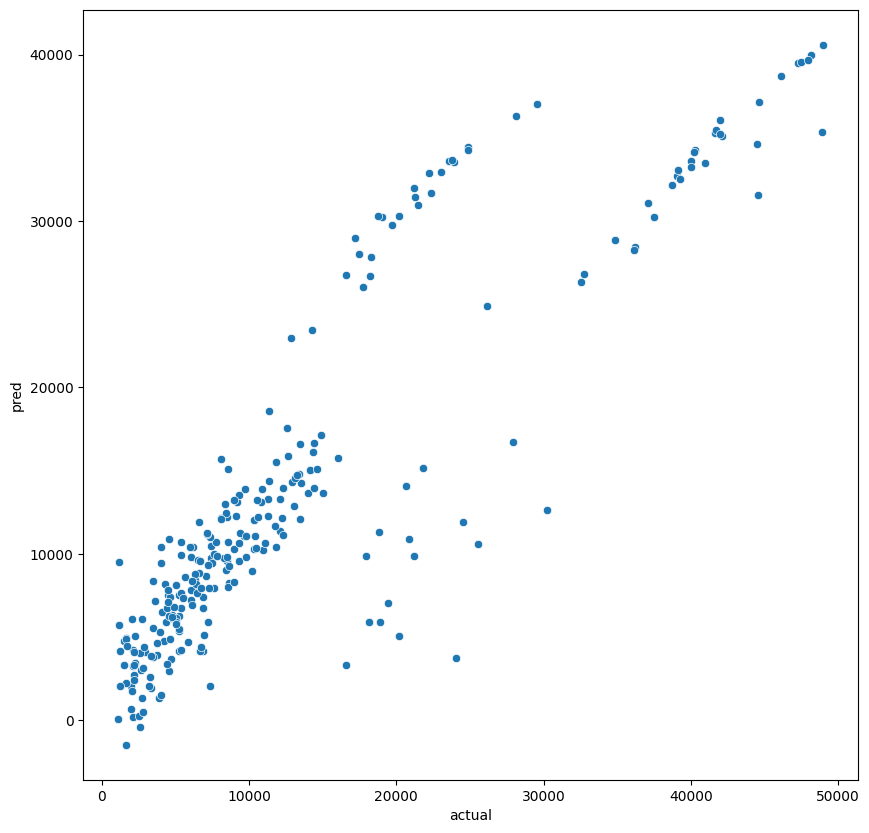

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 10))

# 실제값(actual)과 예측값(pred) 비교하는 산점도 그래프
sns.scatterplot(x='actual', y='pred', data=comparison)


In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred) ** 0.5

5503.571204362846

In [51]:
mean_squared_error(y_test, pred, squared = False) # MSE 함수 안에서 squared 매개변수 False로 설정하면 RMSE를 구할 수 있다 

5503.571204362846

In [53]:
model.score(X_train, y_train) # 좋은 모델 일 수록 1에 가깝다. 0.7~0.8 이상이면 일반적으로 괜찮은 모델

0.7390087247656413

In [54]:
model.coef_ # 각 변수의 계수 (기울기) 를 확인할 수 있다

array([  258.53314931,  -102.47141009,   314.97556402,   478.46811482,
       23786.48289429])

In [58]:
pd.Series(model.coef_, index= X.columns)

age           258.533149
sex          -102.471410
bmi           314.975564
children      478.468115
smoker      23786.482894
dtype: float64

In [59]:
model.intercept_ 

-11785.343018386695